# Data Preproccessing

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten, Embedding, Reshape, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax,RMSprop
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from tqdm import tqdm
import plotly.express as px
plt.rcParams['font.size'] =  12
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 346M/346M [00:16<00:00, 23.9MB/s]
100% 346M/346M [00:16<00:00, 21.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Test and Train path
train_dir = "/content/seg_train/seg_train"
test_dir = "/content/seg_test/seg_test"

In [ ]:
training_data = []
test_data = []
labels = os.listdir(train_dir)
for folder in os.listdir(train_dir):
    training_data.append(len(os.listdir(os.path.join(train_dir,folder))))

for folder in os.listdir(test_dir):
    test_data.append(len(os.listdir(os.path.join(test_dir,folder))))

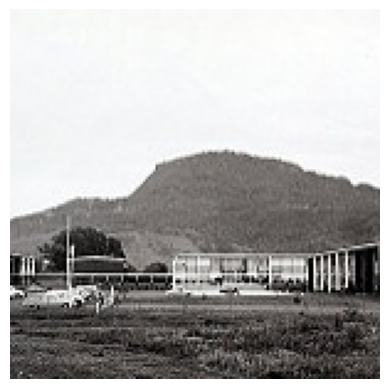

In [ ]:
# Visualize image to check correctness
img = load_img(train_dir + "/buildings/0.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# The images size in dataset.
image_shape = img_to_array(img)
print(image_shape.shape)

(150, 150, 3)


In [ ]:
fig = px.bar(x=labels, y=test_data, title='Class Count Test Data')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [ ]:
batch_size = 32
img_size = 150

datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = datagen.flow_from_directory(train_dir,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                subset='training',
                                                class_mode='categorical')

validation_generator = datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    subset='validation',
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(img_size, img_size),
                                                 batch_size=batch_size,
                                                 shuffle=False,
                                                 class_mode='categorical')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


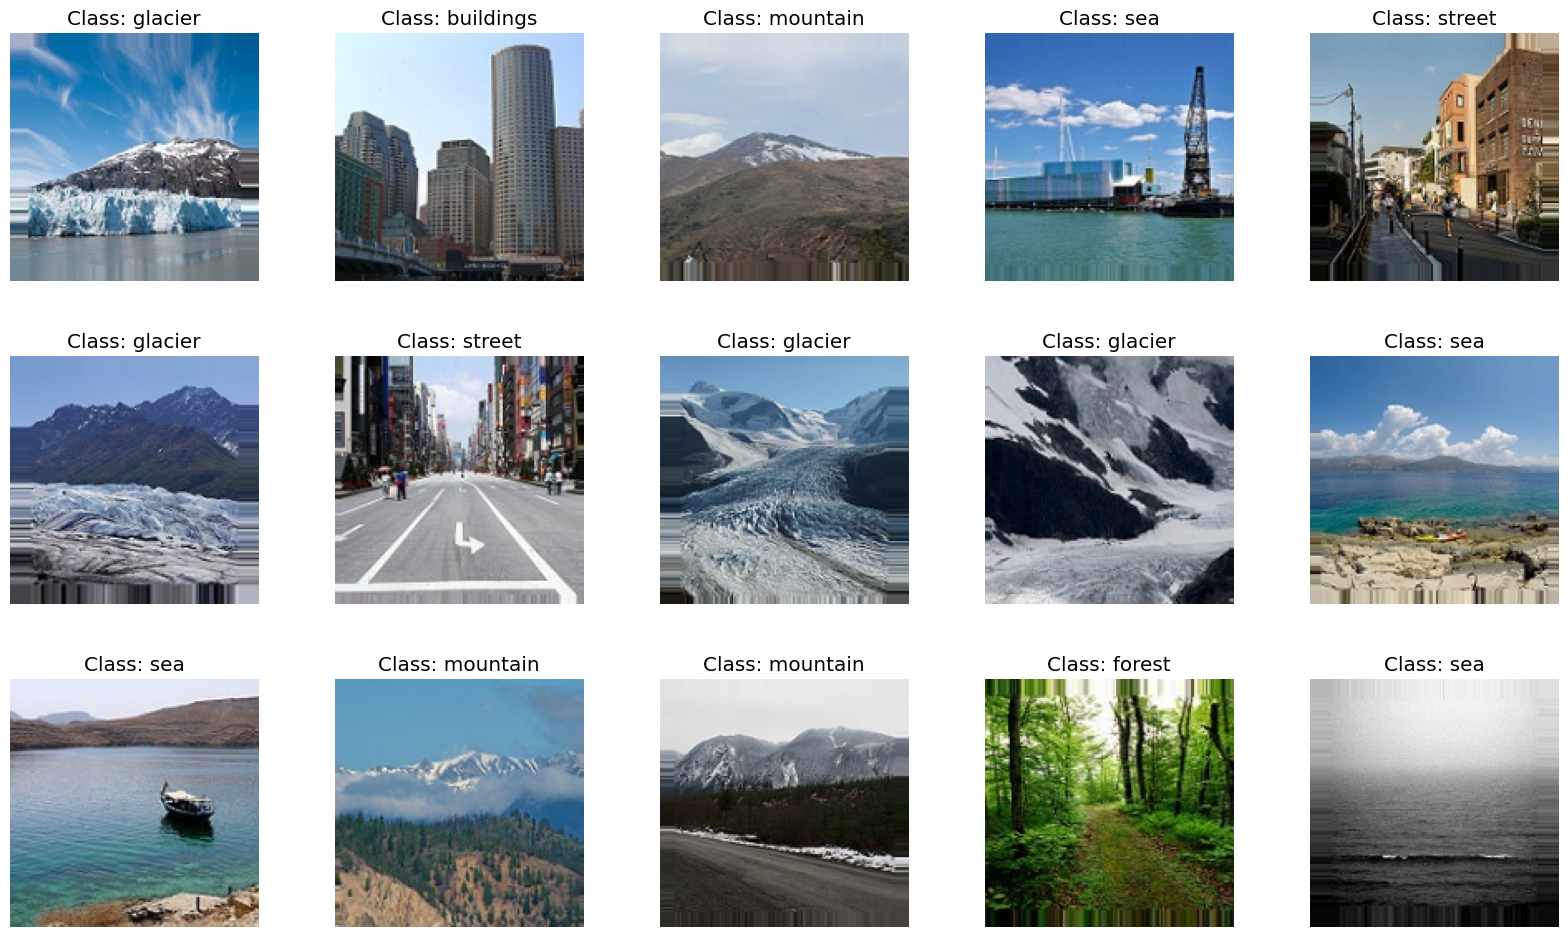

In [ ]:
labels = [k for k,v in train_generator.class_indices.items()]
sample_generate = train_generator.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

# Dense Net(Pretrained)

In [ ]:
imgsize=(150,150,3)
DenseNet121 = Sequential()
pretrained_model = tf.keras.applications.DenseNet121(include_top=False,
                                                  input_shape=imgsize,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
DenseNet121.add(pretrained_model)
DenseNet121.add(layers.Flatten())
# Add Dense layers
DenseNet121.add(layers.Dense(512, activation='relu'))
DenseNet121.add(layers.Dropout(0.3))  # Increase dropout
DenseNet121.add(layers.Dense(6, activation='softmax'))

# Compile the model with a lower learning rate
DenseNet121.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
history = DenseNet121.fit(train_generator, validation_data=validation_generator, epochs=20)
score=DenseNet121.evaluate(test_generator,verbose =1 )
DenseNet121.save('denses.h5')

Epoch 1/20
351/351 [==============================] - 116s 293ms/step - loss: 0.7256 - accuracy: 0.7556 - val_loss: 0.3588 - val_accuracy: 0.8745
Epoch 2/20
351/351 [==============================] - 98s 281ms/step - loss: 0.4165 - accuracy: 0.8502 - val_loss: 0.3488 - val_accuracy: 0.8709
Epoch 3/20
351/351 [==============================] - 95s 272ms/step - loss: 0.3519 - accuracy: 0.8733 - val_loss: 0.3217 - val_accuracy: 0.8845
Epoch 4/20
351/351 [==============================] - 95s 270ms/step - loss: 0.3315 - accuracy: 0.8769 - val_loss: 0.3083 - val_accuracy: 0.8827
Epoch 5/20
351/351 [==============================] - 96s 274ms/step - loss: 0.3126 - accuracy: 0.8826 - val_loss: 0.3099 - val_accuracy: 0.8859
Epoch 6/20
351/351 [==============================] - 93s 264ms/step - loss: 0.2916 - accuracy: 0.8894 - val_loss: 0.2822 - val_accuracy: 0.8991
Epoch 7/20
351/351 [==============================] - 94s 267ms/step - loss: 0.2783 - accuracy: 0.8956 - val_loss: 0.2823 - val_a

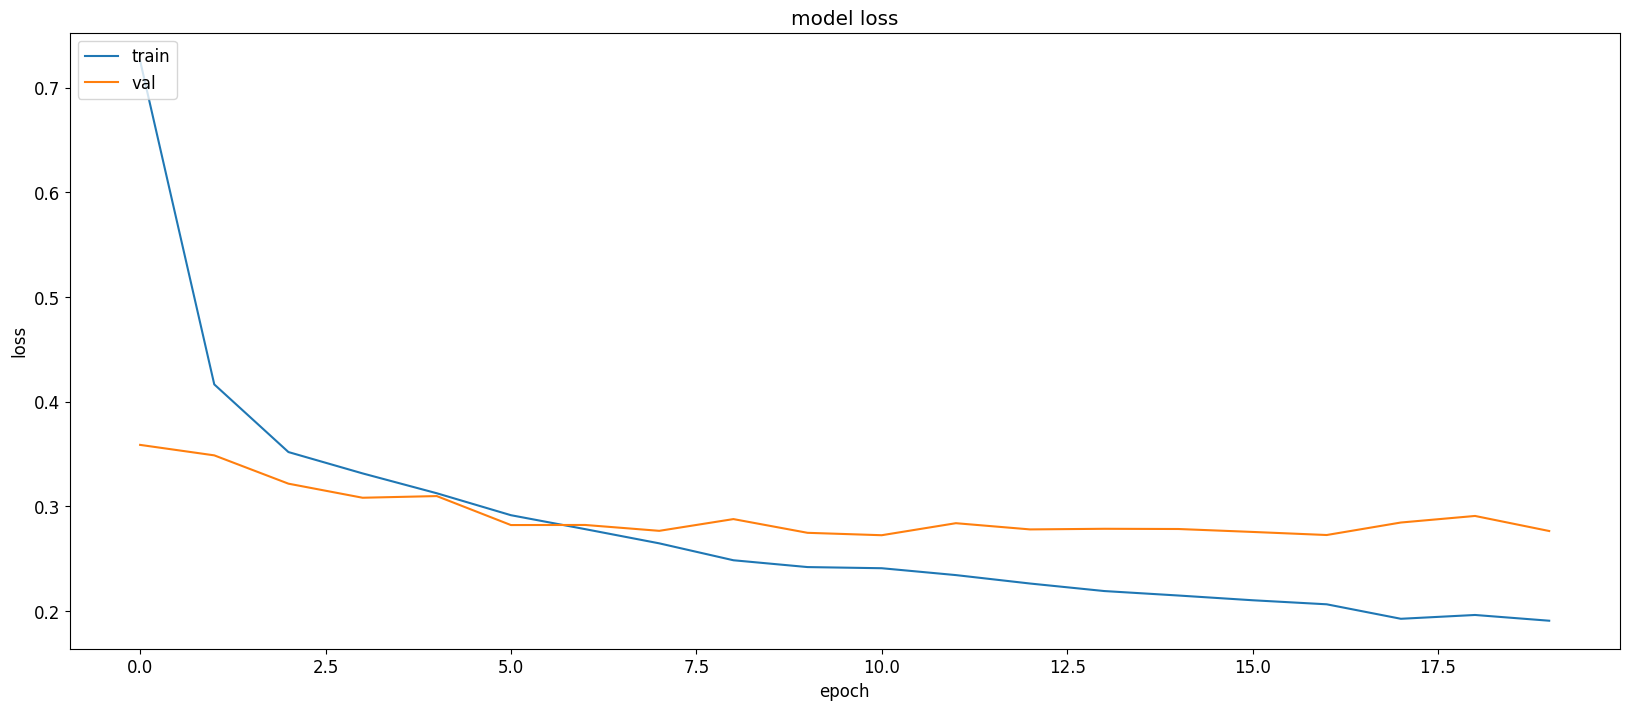

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

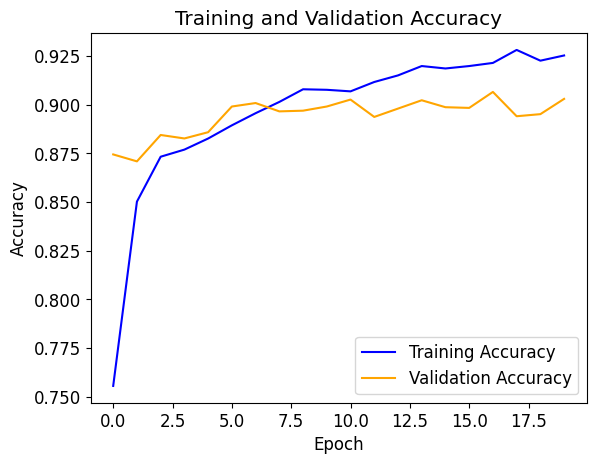

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score=DenseNet121.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 5s 55ms/step - loss: 0.2576 - accuracy: 0.9083


In [ ]:
y_test = test_generator.classes
y_pred = DenseNet121.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

94/94 [==============================] - 7s 49ms/step


In [ ]:
print(classification_report(y_test,y_pred,target_names = labels))

              precision    recall  f1-score   support

   buildings       0.92      0.89      0.91       437
      forest       0.99      0.99      0.99       474
     glacier       0.87      0.81      0.84       553
    mountain       0.84      0.87      0.85       525
         sea       0.93      0.97      0.95       510
      street       0.91      0.94      0.93       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



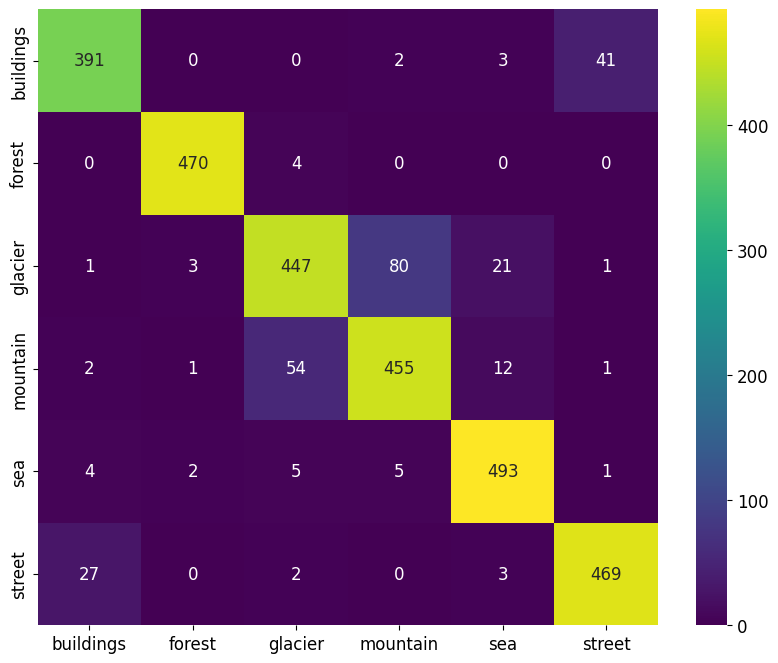

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=labels,yticklabels=labels,cmap='viridis')
plt.show()